In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    # TODO
    min_train = np.amin(train, axis = 0)
    max_train = np.amax(train, axis = 0)
    indicator = (max_train-min_train != 0)
    train = train[:, indicator]
    test = test[:, indicator]
    max_train = max_train[indicator]
    min_train = min_train[indicator]
    
    train_normalized = (train - min_train)/(max_train - min_train)
    test_normalized = (test - min_train)/(max_train - min_train)
    return train_normalized, test_normalized

In [3]:
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    #TODO
    num_instances, num_features = X.shape[0], X.shape[1]
    diff = y - X.dot(theta)
    loss = sum(i**2 for i in diff) / num_instances
    return loss

In [56]:
theta = np.zeros(49)
compute_square_loss(X_train, y_train, theta)

7.961518343622414

In [8]:
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    num_instances, num_features = X.shape[0], X.shape[1]
    grad = 2*(X.dot(theta) - y).dot(X)/num_instances
    return grad

In [58]:
len(X_train)

100

In [57]:
compute_square_loss_gradient(X_train,  y_train, theta)

array([ 0.25182065, -0.15015092, -0.40509526, -0.48635482, -0.09047498,
       -0.14102752, -0.19706508, -0.19706508, -0.43171119, -0.64257159,
       -0.69600073, -0.37699938, -0.00881756,  0.1961221 , -0.61472345,
       -0.71499271, -0.57656883, -0.11765843, -0.16572975, -0.16572975,
       -0.16572975, -0.2405182 , -0.2405182 , -0.2405182 , -0.25532376,
       -0.25532376, -0.25532376, -0.26195435, -0.26195435, -0.26195435,
       -0.2655612 , -0.2655612 , -0.2655612 , -0.29115783, -0.29115783,
       -0.29115783, -0.32684613, -0.32684613, -0.32684613, -0.30492033,
       -0.30492033, -0.30492033, -0.29459583, -0.29459583, -0.29459583,
       -0.28881282, -0.28881282, -0.28881282,  0.36972349])

In [9]:
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    for i in range(num_features):
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        approx_grad[i] = (compute_square_loss(X, y, theta_plus) -
              compute_square_loss(X, y, theta_minus))/(2*epsilon)
    
    return np.linalg.norm(true_gradient-approx_grad) < tolerance

In [10]:
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    for i in range(num_features):
        theta_plus = np.copy(theta)
        theta_minus = np.copy(theta)
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon
        approx_grad[i] = (objective_func(X, y, theta_plus) -
              objective_func(X, y, theta_minus))/(2*epsilon)
        if abs(true_gradient[i]-approx_grad[i]) > tolerance:
            return False
    
    return True

In [11]:
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    #TODO
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X, y, theta)
    for i in range(num_step):
        if grad_check == True and grad_checker(X, y, theta) == False:
            return False
        gradient = compute_square_loss_gradient(X, y, theta)
        theta = theta- alpha*gradient
        theta_hist[i+1] = theta
        loss_hist[i+1] = compute_square_loss(X,y, theta)
    return theta_hist, loss_hist

In [455]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X, y)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
    # TODO
    return X_train, y_train

In [456]:
X_train, y_train = main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

/Users/zihaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/zihaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


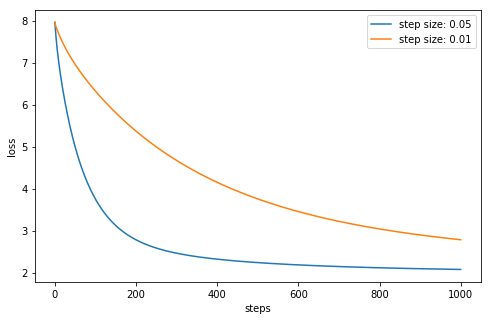

In [12]:
_,a = batch_grad_descent(X_train, y_train,alpha=0.5)
_,b = batch_grad_descent(X_train, y_train,alpha=0.1)
_,c = batch_grad_descent(X_train, y_train,alpha=0.05)
_,d = batch_grad_descent(X_train, y_train,alpha=0.01)

fig = plt.figure(figsize=(8,5))

plt.plot(c, label="step size: 0.05")
plt.plot(d, label="step size: 0.01")
plt.legend()
plt.xlabel('steps')
plt.ylabel('loss')
plt.savefig('342.png')

In [42]:
### Backtracking line search
#Check http://en.wikipedia.org/wiki/Backtracking_line_search for details
#TODO
def batch_grad_descent_backtracking(X, y, alpha=0.5, beta = 0.4, num_step=1000, grad_check=False,stop =1,stop_if= 0.01):
    """
    In this question you will implement backtracking to do batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        beta - the proportion of alpha for each iteration
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    #TODO
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X, y, theta)
    temp = alpha
    for i in range(num_step):
        if grad_check == True and grad_checker(X, y, theta) == False:
            return False
        alpha = temp
        gradient = compute_square_loss_gradient(X, y, theta)
    
        while (compute_square_loss(X,y, theta) - compute_square_loss(X, y, theta-alpha*gradient) 
               < alpha / 2 *np.dot(gradient, gradient)): #sum([gr**2 for gr in gradient])):   # c = 1/2, m = gradient
            alpha *= beta
        theta = theta- alpha*gradient
        theta_hist[i+1] = theta
        loss_hist[i+1] = compute_square_loss(X,y, theta)
#         if stop_if == 1:
#             if loss_hist[i+1]-loss_hist[i-1] < stop:
#                 break
    return theta_hist, loss_hist

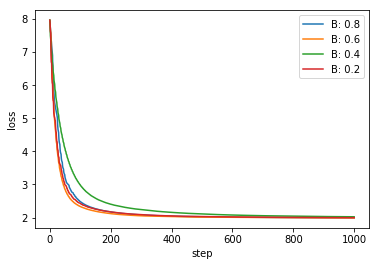

In [43]:
beta_sizes= [0.8,0.6,0.4,0.2]

for beta in beta_sizes:
    _,a = batch_grad_descent_backtracking(X_train, y_train,beta = beta)
    plt.plot(a, label = 'B: {}'.format(beta) )
    plt.xlabel('step')
    plt.ylabel('loss')
    plt.legend()
    plt.savefig('343.png')

In [47]:
%timeit batch_grad_descent(X_train,y_train)


/Users/zihaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/zihaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


104 ms ± 661 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%timeit batch_grad_descent_backtracking

22.4 ns ± 0.532 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## 3.5 Ridge Regression

### 3.5.2

In [49]:
#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    num_instances = X.shape[0]
    grad = 2*(X.dot(theta) - y).dot(X)/num_instances + 2*lambda_reg*theta
    return grad

In [50]:
theta = np.zeros(49)
compute_regularized_square_loss_gradient(X_train, y_train, theta, 0.01)

array([ 0.25182065, -0.15015092, -0.40509526, -0.48635482, -0.09047498,
       -0.14102752, -0.19706508, -0.19706508, -0.43171119, -0.64257159,
       -0.69600073, -0.37699938, -0.00881756,  0.1961221 , -0.61472345,
       -0.71499271, -0.57656883, -0.11765843, -0.16572975, -0.16572975,
       -0.16572975, -0.2405182 , -0.2405182 , -0.2405182 , -0.25532376,
       -0.25532376, -0.25532376, -0.26195435, -0.26195435, -0.26195435,
       -0.2655612 , -0.2655612 , -0.2655612 , -0.29115783, -0.29115783,
       -0.29115783, -0.32684613, -0.32684613, -0.32684613, -0.30492033,
       -0.30492033, -0.30492033, -0.29459583, -0.29459583, -0.29459583,
       -0.28881282, -0.28881282, -0.28881282,  0.36972349])

### 3.5.3

In [51]:
### The regularized square loss function
def compute_regularized_square_loss(X, y, theta, lambda_reg = 10**-2):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)
        lambda_reg - the regularization coefficient
    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    #TODO
    num_instances, num_features = X.shape[0], X.shape[1]
    diff = y - X.dot(theta)
    loss = sum(i**2 for i in diff) / num_instances + lambda_reg*(theta.T).dot(theta)
    return loss

In [52]:
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO
    
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X, y, theta)#, lambda_reg)
    
    for i in range(num_step):
        gradient = compute_regularized_square_loss_gradient(X, y, theta=theta, lambda_reg=lambda_reg)
        theta -= alpha*gradient
        theta_hist[i+1] = theta
        loss_hist[i+1] = compute_square_loss(X, y, theta=theta)#, lambda_reg=lambda_reg)
    return theta_hist, loss_hist
    

In [53]:
theta=np.zeros(49)
regularized_grad_descent(X_train, y_train)

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.01259103,  0.00750755,  0.02025476, ...,  0.01444064,
          0.01444064, -0.01848617],
        [-0.05578979, -0.01564905,  0.0099683 , ...,  0.00768725,
          0.00768725, -0.06755668],
        ...,
        [-1.34404296,  0.56947785,  1.39108433, ...,  0.02896084,
          0.02896084, -1.18793078],
        [-1.34409056,  0.56951581,  1.39090374, ...,  0.02892136,
          0.02892136, -1.18783728],
        [-1.34413798,  0.56955381,  1.39072342, ...,  0.02888194,
          0.02888194, -1.18774399]]),
 array([7.96151834, 7.82651953, 7.70402325, ..., 2.28492578, 2.28482008,
        2.28471467]))

### 3.5.6

In [54]:
def regularized_grad_descent_plot(X_train, y_train, X_test, y_test, B_list, alpha =0.01, lambda_reg = 0.2, num_step=1000):
    """
    We will plot the loss vs num_steps using different B values for the biased term
    
    Args:
        X_train - the train feature vector, 2D numpy array of size (num_instances, num_features)
        y_train - the train label vector, 1D numpy array of size (num_instances)
        X_test - the test feature vector, 2D numpy array of size (num_instances, num_features)
        y_test - the test label vector, 1D numpy array of size (num_instances)
        B_list - the list of B value
        alpha - the step size
        num_step - number of steps to run
    """
    
    num_instances, num_features = X_train.shape[0], X_train.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    
    loss_regularize = np.zeros(len(B_list))
    loss_test = np.zeros(len(B_list))
    
    for i, b in enumerate(B_list):
        X_train_b = np.copy(X_train)
        X_train_b[:,-1] *= b
        X_test_b = np.copy(X_test)
        X_test_b[:,-1] *= b
        #num_step= int(1000*b)
        theta_hist, loss_hist = regularized_grad_descent(X_train_b, y_train, alpha=alpha/np.sqrt(b), 
                                                         lambda_reg = lambda_reg, num_step=num_step)
        theta = theta_hist[num_step]
        loss_regularize[i] = compute_regularized_square_loss(X_test_b, y_test, theta,lambda_reg)
        loss_test[i] = compute_square_loss(X_test, y_test, theta)
        
    plt.figure(figsize=(8, 4))
    plt.plot(B_list,loss_test,label='test loss')
    plt.xlabel("B")
    plt.ylabel("Squared Loss")
    #plt.xlim(1,10)
    plt.legend()
    plt.savefig('3561.png')
    plt.show()
    plt.plot(B_list,loss_regularize,label='Regularized Loss')
    plt.xlabel('B')
    plt.ylabel('Test Loss')
    plt.legend()
    plt.savefig('3562.png')
    plt.show()
    
    

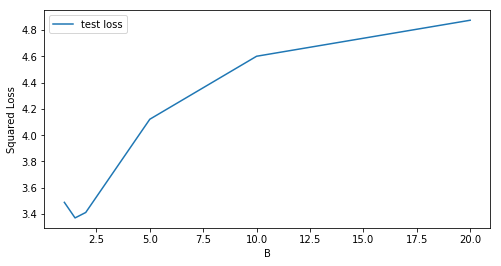

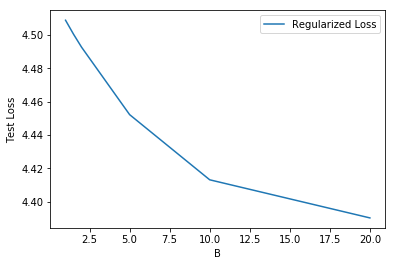

In [55]:
B_list = [1,1.5,2,5,10,20]
regularized_grad_descent_plot(X_train, y_train, X_test, y_test, B_list = B_list)

### 3.5.7

In [72]:
def regularized_grad_descent_plot_lambda(X_train, y_train, X_test, y_test, lambda_list, alpha =0.02, num_step=1000):
    """
    We will plot the loss vs num_steps using different B values for the biased term
    
    Args:
        X_train - the train feature vector, 2D numpy array of size (num_instances, num_features)
        y_train - the train label vector, 1D numpy array of size (num_instances)
        X_test - the test feature vector, 2D numpy array of size (num_instances, num_features)
        y_test - the test label vector, 1D numpy array of size (num_instances)
        alpha - the step size
        lambda_list - the list of different lambda values
        num_step - number of steps to run
    """
    
    num_instances, num_features = X_train.shape[0], X_train.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    losses_train = np.zeros(len(lambda_list))
    losses_test = np.zeros(len(lambda_list))
    
    for i, ld in enumerate(lambda_list):
        theta_hist, loss_hist = regularized_grad_descent(X_train, y_train, alpha=alpha, 
                                                         lambda_reg = ld, num_step=num_step)
        theta = theta_hist[num_step]
        losses_train[i] = compute_square_loss(X_train, y_train, theta)
        losses_test[i] = compute_square_loss(X_test, y_test, theta)
        
    plt.figure(figsize=(10, 5))
    plt.plot(np.log10(lambda_list),losses_train,label='Train')
    plt.plot(np.log10(lambda_list),losses_test,label='Test')
    plt.xlabel("log(lambda_reg)")
    plt.ylabel("squared loss")
    plt.legend()
    plt.show()

/Users/zihaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/zihaoguo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


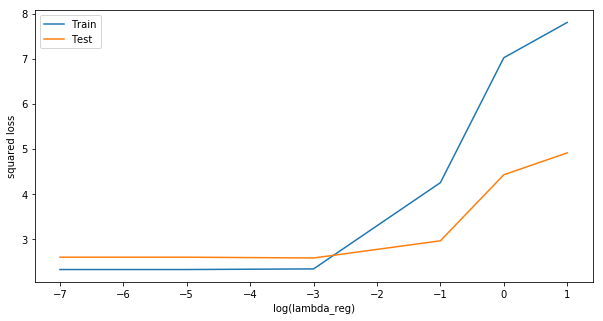

In [68]:
lambda_list=[10**-7, 10**-5, 10**-3, 10**-1, 1,10,100]
regularized_grad_descent_plot_lambda(X_train, y_train, X_test, y_test, lambda_list)

[2.32393725 2.33662132 2.36965768 2.49281979 4.25005941 7.686982
 4.25005941]


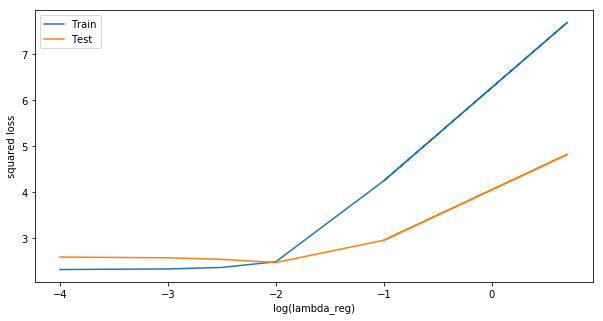

In [130]:
lambda_list=[10**-4, 10**-3, 10**-2.5, 10**-2, 10**-1,5, 10**-1]
regularized_grad_descent_plot_lambda(X_train, y_train, X_test, y_test, lambda_list)

### 3.6.4

In [89]:
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.005, lambda_reg=10**-2, C= 0.1, B =1.5, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    X[:,-1] *= B
    #losses = np.zeros(num_epoch)
    #temp_index = 0
    start = 0
    if isinstance(alpha, float) == False:
        start = 100
        theta_hist = np.zeros((num_epoch-100, num_instances, num_features)) #Initialize theta_hist
        loss_hist = np.zeros((num_epoch-100, num_instances)) #Initialize loss_hist
    for i in range(start, num_epoch):
        if isinstance(alpha, float) == False:
            if alpha == '1/sqrt(t)':
                alpha = C/np.sqrt(i)
            elif alpha == '1/t':
                alpha = C/i
            elif (alpha == "mode3"):
                alpha = 0.01
                alpha = alpha/(1+alpha*lambda_reg*i)
            else:
                return None, None
        
        index = np.array(range(num_instances))
        np.random.shuffle(index)
        for k, j in enumerate(index):
            gradient = compute_regularized_square_loss_gradient(X[j,:].reshape(1, X[j,:].shape[0]), y[j], theta, lambda_reg)
            theta -= alpha*gradient
            theta_hist[i-start, k] = theta
            loss = compute_square_loss(X[j, :].reshape(1,X[j,:].shape[0]), y[j], theta)
            if loss > 999999999999:
                print( '{} overflow'.format(alpha))
                return None, None
            loss_hist[i-start, k] = loss
            
    return theta_hist, loss_hist
    

### 3.6.5

In [90]:
theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train)

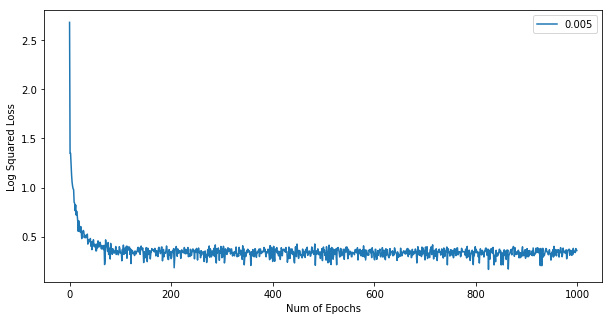

In [91]:
losses = np.log(np.mean(loss_hist,axis=1))
plt.figure(figsize=(10,5))
plt.plot(range(1000),losses, label = '0.005')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

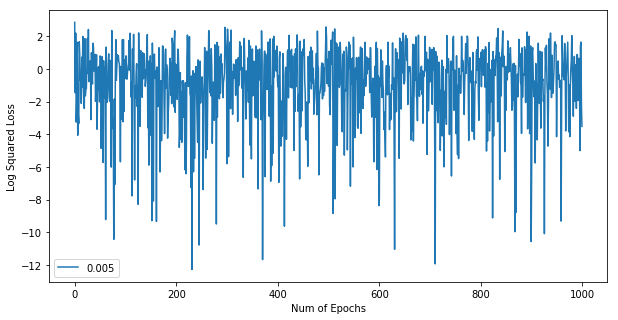

In [92]:
losses= np.log(loss_hist[:,X_train.shape[0]-1])
plt.figure(figsize=(10,5))
plt.plot(range(1000),losses, label = '0.005')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

#### C=0.1, alpha ='1/t'

In [100]:
theta_hist_1, loss_hist_1 = stochastic_grad_descent(X_train, y_train, alpha = '1/t')

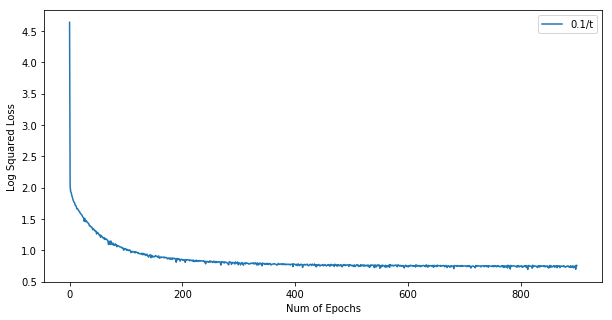

In [101]:
losses = np.log(np.mean(loss_hist_1,axis=1))
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = '0.1/t')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

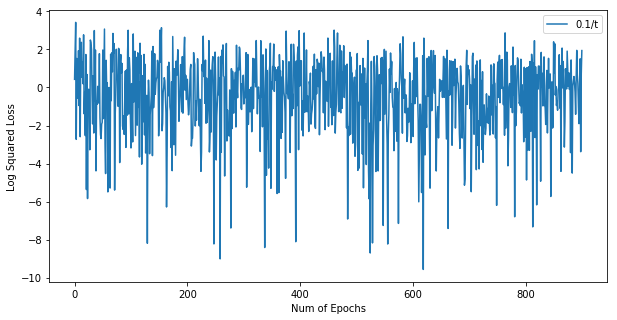

In [102]:
losses= np.log(loss_hist_1[:,X_train.shape[0]-1])
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = '0.1/t')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

#### C=0.1, alpha = '1/sqrt(t)'

In [103]:
theta_hist_2, loss_hist_2 = stochastic_grad_descent(X_train, y_train, alpha = '1/sqrt(t)')

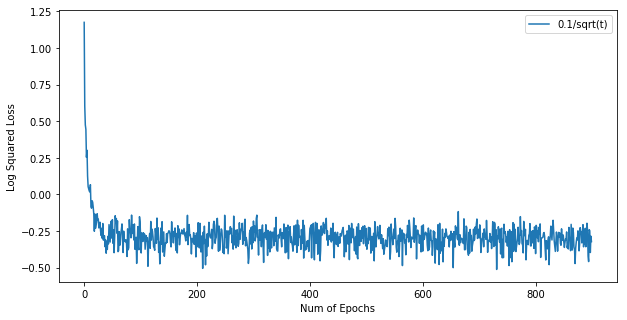

In [104]:
losses = np.log(np.mean(loss_hist_2,axis=1))
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = '0.1/sqrt(t)')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

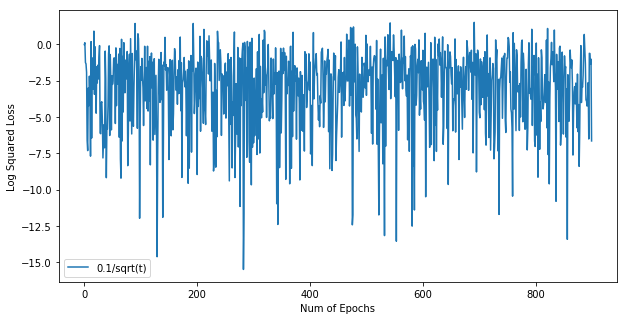

In [98]:
losses= np.log(loss_hist_2[:,X_train.shape[0]-1])
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = '0.1/sqrt(t)')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

### 3.6.6

In [345]:
theta_hist_3, loss_hist_3 = stochastic_grad_descent(X_train, y_train, alpha = 'mode3')

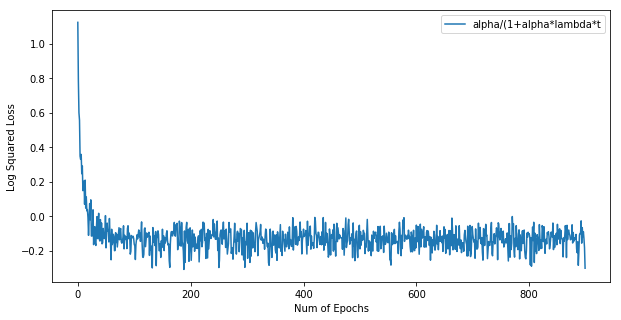

In [349]:
losses = np.log(np.mean(loss_hist_3,axis=1))
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = 'alpha/(1+alpha*lambda*t')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

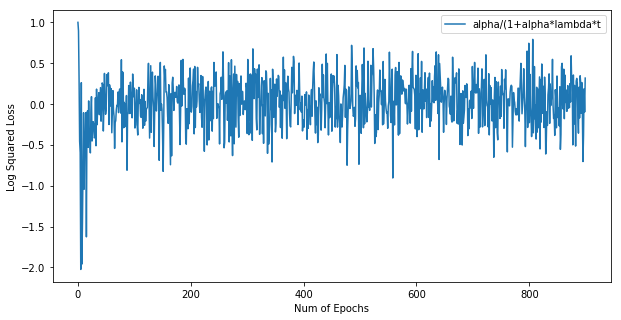

In [348]:
losses= np.log(loss_hist_3[:,X_train.shape[0]-1])
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = 'alpha/(1+alpha*lambda*t')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

In [99]:
X_train, y_train, X_test, y_test =main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


In [77]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
    # TODO
    return X_train, y_train, X_test, y_test
    
if __name__ == "__main__":
    main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


#### Averaged SGD

In [129]:
### Stochastic gradient descent
def avg_stochastic_grad_descent(X, y, alpha=0.005, lambda_reg=10**-2, C= 0.1, B =1.5, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    X[:,-1] *= B
    #losses = np.zeros(num_epoch)
    #temp_index = 0
    start = 0
    if isinstance(alpha, float) == False:
        start = 100
        theta_hist = np.zeros((num_epoch-100, num_instances, num_features)) #Initialize theta_hist
        loss_hist = np.zeros((num_epoch-100, num_instances)) #Initialize loss_hist
    for i in range(start, num_epoch):
        if isinstance(alpha, float) == False:
            if alpha == '1/sqrt(t)':
                alpha = C/np.sqrt(i)
            elif alpha == '1/t':
                alpha = C/i
            elif (alpha == "mode3"):
                alpha = 0.01
                alpha = alpha/(1+alpha*lambda_reg*i)
            else:
                return None, None
        
        index = np.array(range(num_instances))
        np.random.shuffle(index)
        for k, j in enumerate(index):
            gradient = compute_regularized_square_loss_gradient(X[j,:].reshape(1, X[j,:].shape[0]), y[j], theta, lambda_reg)
            theta -= alpha*gradient
            theta_hist[i-start, k] = theta
            theta = np.sum(theta_hist[i-100,:k+1],axis= 0)/(k+1)
            loss = compute_square_loss(X[j, :].reshape(1,X[j,:].shape[0]), y[j], theta)
            if loss > 999999999999:
                print( '{} overflow'.format(alpha))
                return None, None
            loss_hist[i-start, k] = loss
            
    return theta_hist, loss_hist

In [110]:
a = np.array([[[1,2],[2,3]],[[3,4],[4,5]],[[5,6],[6,7]],[[7,8],[8,9]]])

In [122]:
np.sum(a[0,:2],axis = 0)/2

array([1.5, 2.5])

In [130]:
theta_hist_4, loss_hist_4 = avg_stochastic_grad_descent(X_train, y_train, alpha = '1/sqrt(t)')

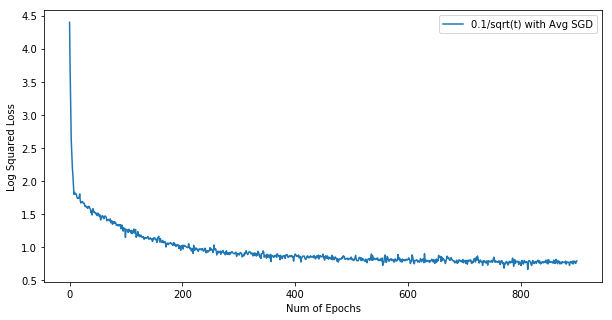

In [132]:
losses = np.log(np.mean(loss_hist_4,axis=1))
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = '0.1/sqrt(t) with Avg SGD')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()

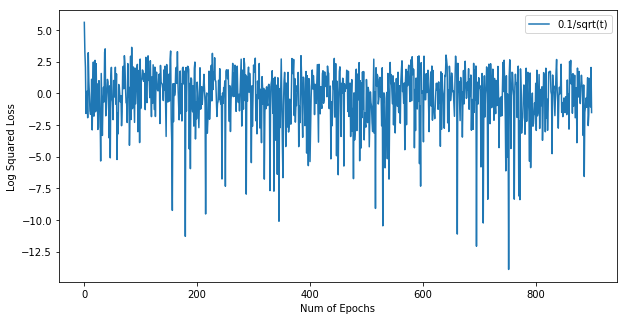

In [133]:
losses= np.log(loss_hist_4[:,X_train.shape[0]-1])
plt.figure(figsize=(10,5))
plt.plot(range(900),losses, label = '0.1/sqrt(t)')
plt.xlabel("Num of Epochs")
plt.ylabel('Log Squared Loss')
plt.legend()